In [18]:
import pandas as pd

df = pd.read_csv("c:/data/time/data2.csv")
df.head()

,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


In [19]:
# 전처리 → 문자열 변수 date 를 datetime 타입으로 변경

df["date"] = pd.to_datetime(df["date"])
# 이 날짜를 index로 설정
df = df.set_index("date")

df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


<Axes: xlabel='date'>

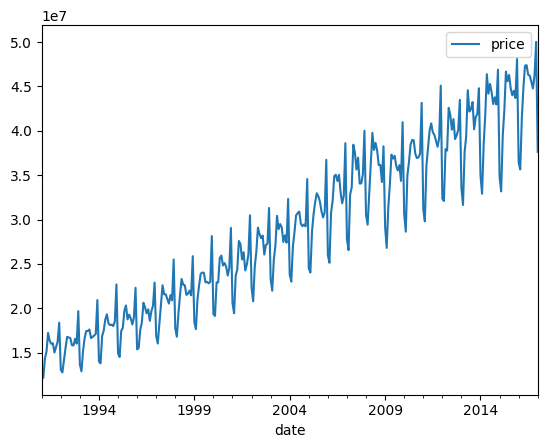

In [20]:
df.plot()

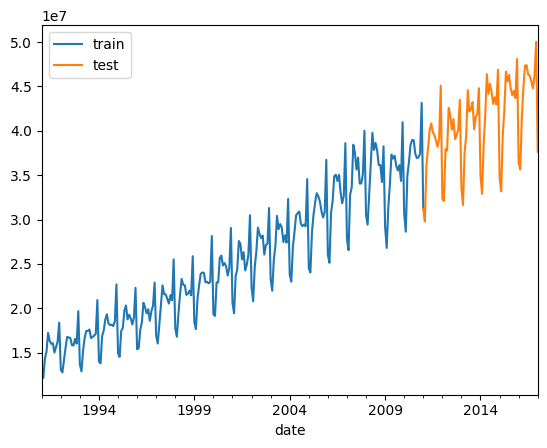

In [21]:
# 인덱스가 0,1,2,3 ... 에서 날짜로 변경됨
# 학습할 변수는 date
import matplotlib.pyplot as plt

split_date = pd.Timestamp("01-01-2011")
# 학습용: 2011/1/1까지의 자료
# 검증용: 이후 자료
train = df.loc[:split_date, ["price"]]
test = df.loc[split_date:, ["price"]]
ax = train.plot()
test.plot(ax=ax)
plt.legend(["train", "test"])

In [22]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(train)
train_sc = sc.transform(train)
test_sc = sc.transform(test)

In [23]:
# 넘파이배열을 데이터프레임으로 변환
train_sc_df = pd.DataFrame(train_sc, columns=["Scaled"], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=["Scaled"], index=test.index)
train_sc_df.head()

,Scaled
date,
1991-01-01,0.014020
1991-02-01,0.000000
1991-03-01,0.070426
1991-04-01,0.095318
1991-05-01,0.163628


In [24]:
s = pd.Series([100, 200, 300])
s2 = s.shift(1)
print(s)
print(s2)

0    100
1    200
2    300
dtype: int64
0      NaN
1    100.0
2    200.0
dtype: float64


In [25]:
for s in range(1, 13):
    train_sc_df["shift_{}".format(s)] = train_sc_df["Scaled"].shift(s)
    test_sc_df["shift_{}".format(s)] = test_sc_df["Scaled"].shift(s)

train_sc_df.head(13)
# 과거값 12개로 현재값을 예측하고자 함

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-01,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-01,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [26]:
# 결측값 NaN 제거
# 독립변수 : shift_1 ~ shift_12
X_train = train_sc_df.dropna().drop("Scaled", axis=1)
# 종속변수 : Scaled
y_train = train_sc_df.dropna()[["Scaled"]]
X_test = test_sc_df.dropna().drop("Scaled", axis=1)
y_test = test_sc_df.dropna()[["Scaled"]]

In [27]:
# 넘파이배열로 저장
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

# print(X_train.shape)
print(X_train)
# print(y_train_shape)
print(y_train)

[[0.20091289 0.13173822 0.11139526 ... 0.0704258  0.         0.01402033]
 [0.03002688 0.20091289 0.13173822 ... 0.09531795 0.0704258  0.        ]
 [0.01999285 0.03002688 0.20091289 ... 0.16362761 0.09531795 0.0704258 ]
 ...
 [0.80210057 0.79916654 0.81439355 ... 0.59734863 0.92972161 0.71629034]
 [0.81482896 0.80210057 0.79916654 ... 0.53166512 0.59734863 0.92972161]
 [1.         0.81482896 0.80210057 ... 0.73605008 0.53166512 0.59734863]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.17230214]
 [0.21246911]
 [0.23131079]
 [0.1982186 ]
 [0.19187716]
 [0.19381714]
 [0.18857277]
 [0.20528237]
 [0.33988685]
 [0.08949179]
 [0.07634802]
 [0.17110473]
 [0.181320

In [28]:
# 케라스에 필요한 3차원 형태로 변환
# RNN에는 시간 개념이 있기 때문에 차원이 추가됨
# [size,timestep,변수개수]
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(229, 12, 1)
[[[0.20091289]
  [0.13173822]
  [0.11139526]
  ...
  [0.0704258 ]
  [0.        ]
  [0.01402033]]

 [[0.03002688]
  [0.20091289]
  [0.13173822]
  ...
  [0.09531795]
  [0.0704258 ]
  [0.        ]]

 [[0.01999285]
  [0.03002688]
  [0.20091289]
  ...
  [0.16362761]
  [0.09531795]
  [0.0704258 ]]

 ...

 [[0.80210057]
  [0.79916654]
  [0.81439355]
  ...
  [0.59734863]
  [0.92972161]
  [0.71629034]]

 [[0.81482896]
  [0.80210057]
  [0.79916654]
  ...
  [0.53166512]
  [0.59734863]
  [0.92972161]]

 [[1.        ]
  [0.81482896]
  [0.80210057]
  ...
  [0.73605008]
  [0.53166512]
  [0.59734863]]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.172

In [29]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(20, input_shape=(12, 1)))  # (timestep, 변수개수)
model.add(Dense(1))  # 출력층의 노드 개수 1
# mean_squared_error 연속적인 값 예측
model.compile(loss="mse", optimizer="adam")

c:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - loss: 0.3074   
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.2077  
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1470  
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.1031  
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0560 
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0326  
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0173  
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0188  
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.0193
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0156  
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 
Epoch 14/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0141  
Epoch 15/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0136  
Epoch 16/250
4/4 ━━━━━━━━━━━━

In [31]:
score = model.evaluate(X_test_t, y_test, verbose=0)
print(score)  # 평균제곱오차
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.008171363733708858
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[0.75605994 0.76831335 0.85140395 0.87921065 0.90010554 0.9050418
 0.89155143 0.88573146 0.8781176  0.8722012 ]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [32]:
import numpy as np

# 실제값-예측값의 평균값
np.mean(y_test - y_pred)

0.023189228290585093

In [33]:
y_predicted = sc.inverse_transform(y_pred)
y_tested = sc.inverse_transform(y_test)
np.mean(y_tested - y_predicted)

718718.4590163934

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 


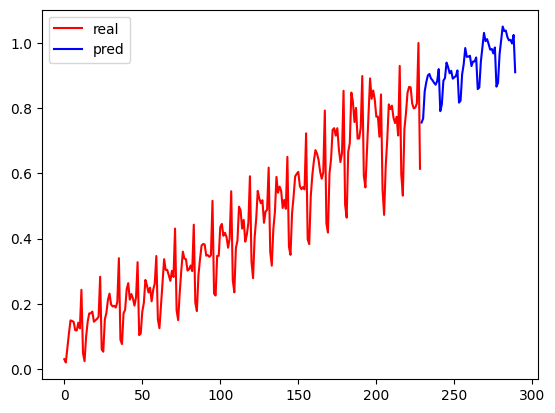

In [34]:
import matplotlib.pyplot as plt

pred = model.predict(X_test_t)
a = np.concatenate((y_train.flatten(), np.zeros(len(y_test)) + np.nan))
b = np.concatenate((np.zeros(len(y_train)) + np.nan, pred.flatten()))
plt.plot(a, "r-", label="real")
plt.plot(b, "b-", label="pred")
plt.legend()
plt.show()

In [35]:
# 스케일링을 하지 않은 경우의 예 → 오차가 너무 커지는 문제
import pandas as pd

df = pd.read_csv('c:/data/time/data2.csv')
df.head()

,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


In [36]:
df["date"] = pd.to_datetime(df["date"])

# 이 날짜를 index로 설정
df = df.set_index("date")
df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


<Axes: xlabel='date'>

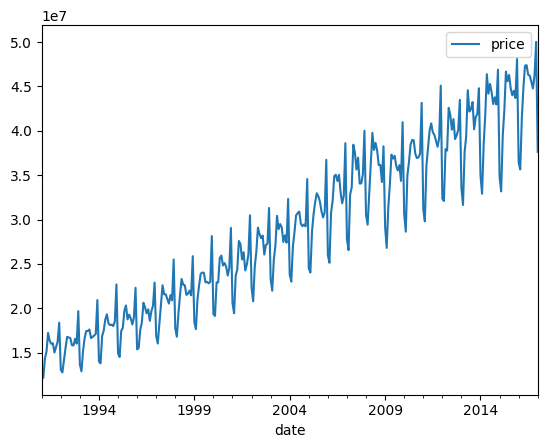

In [37]:
df.plot()

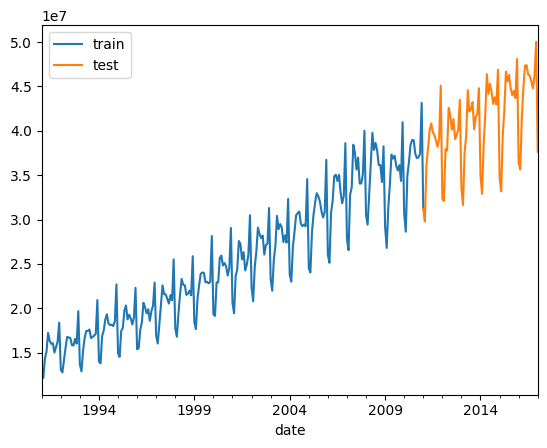

In [38]:
import matplotlib.pyplot as plt

split_date = pd.Timestamp("01-01-2011")
# 학습용: 2011/1/1까지의 자료
# 검증용: 이후 자료
train = df.loc[:split_date, ["price"]]
test = df.loc[split_date:, ["price"]]
ax = train.plot()
test.plot(ax=ax)
plt.legend(["train", "test"])

In [39]:
train_sc_df = pd.DataFrame(train, columns=["price"], index=train.index)
test_sc_df = pd.DataFrame(test, columns=["price"], index=test.index)
train_sc_df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


In [40]:
for s in range(1, 13):
    train_sc_df["shift_{}".format(s)] = train_sc_df["price"].shift(s)
    test_sc_df["shift_{}".format(s)] = test_sc_df["price"].shift(s)

train_sc_df.head(13)

,price,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-01,12588862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,12154321,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,14337072,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,15108570,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,17225734,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,16342833,17225734.0,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,15996243,16342833.0,17225734.0,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,16064910,15996243.0,16342833.0,17225734.0,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN,NaN
1991-09-01,15015317,16064910.0,15996243.0,16342833.0,17225734.0,15108570.0,14337072.0,12154321.0,12588862.0,NaN,NaN,NaN,NaN


In [41]:
# 독립변수 : shift_1 ~ shift_12
X_train = train_sc_df.dropna().drop("price", axis=1)

# 종속변수 : Scaled
y_train = train_sc_df.dropna()[["price"]]

X_test = test_sc_df.dropna().drop("price", axis=1)
y_test = test_sc_df.dropna()[["price"]]

In [42]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# print(X_train.shape)
print(X_train)
# print(y_train_shape)
print(y_train)

[[18381340. 16237366. 15606864. ... 14337072. 12154321. 12588862.]
 [13084963. 18381340. 16237366. ... 15108570. 14337072. 12154321.]
 [12773972. 13084963. 18381340. ... 17225734. 15108570. 14337072.]
 ...
 [37014326. 36923390. 37395330. ... 30668321. 40969765. 34354756.]
 [37408825. 37014326. 36923390. ... 28632551. 30668321. 40969765.]
 [43147947. 37408825. 37014326. ... 34967182. 28632551. 30668321.]]
[[13084963]
 [12773972]
 [14198775]
 [15558390]
 [16776396]
 [16716231]
 [16637483]
 [15842075]
 [15812400]
 [16562268]
 [16015869]
 [19682921]
 [13672727]
 [12900733]
 [15211859]
 [16642246]
 [17442405]
 [17444074]
 [17610326]
 [16645660]
 [16790330]
 [16921755]
 [17124609]
 [20928208]
 [14005058]
 [13799079]
 [16865149]
 [17494589]
 [18739509]
 [19323481]
 [18297834]
 [18101290]
 [18161417]
 [17998875]
 [18516766]
 [22688647]
 [14927996]
 [14520623]
 [17457477]
 [17774107]
 [19740889]
 [20319460]
 [18747299]
 [19280525]
 [18860566]
 [18177152]
 [18962903]
 [22308880]
 [15379086]
 [15

In [43]:
X_train.shape

(229, 12)

In [44]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(229, 12, 1)
[[[18381340.]
  [16237366.]
  [15606864.]
  ...
  [14337072.]
  [12154321.]
  [12588862.]]

 [[13084963.]
  [18381340.]
  [16237366.]
  ...
  [15108570.]
  [14337072.]
  [12154321.]]

 [[12773972.]
  [13084963.]
  [18381340.]
  ...
  [17225734.]
  [15108570.]
  [14337072.]]

 ...

 [[37014326.]
  [36923390.]
  [37395330.]
  ...
  [30668321.]
  [40969765.]
  [34354756.]]

 [[37408825.]
  [37014326.]
  [36923390.]
  ...
  [28632551.]
  [30668321.]
  [40969765.]]

 [[43147947.]
  [37408825.]
  [37014326.]
  ...
  [34967182.]
  [28632551.]
  [30668321.]]]
[[13084963]
 [12773972]
 [14198775]
 [15558390]
 [16776396]
 [16716231]
 [16637483]
 [15842075]
 [15812400]
 [16562268]
 [16015869]
 [19682921]
 [13672727]
 [12900733]
 [15211859]
 [16642246]
 [17442405]
 [17444074]
 [17610326]
 [16645660]
 [16790330]
 [16921755]
 [17124609]
 [20928208]
 [14005058]
 [13799079]
 [16865149]
 [17494589]
 [18739509]
 [19323481]
 [18297834]
 [18101290]
 [18161417]
 [17998875]
 [18516766]
 

In [45]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(20, input_shape=(12, 1)))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()

c:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 20)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,781 (6.96 KB)

 Trainable params: 1,781 (6.96 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 726152268218368.0000  
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 712266370514944.0000
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 726959185199104.0000  
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 710856413282304.0000  
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 714329431212032.0000 
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 718748952559616.0000  
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 727626649960448.0000  
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 702038576988160.0000  
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 711031835852800.0000 
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 729356582256640.0000  
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 709051184840704.0000 
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 709699188031488.0000  
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [47]:
score = model.evaluate(X_test_t, y_test, verbose=0)
print(score)
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

1760141351321600.0
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001C603426B60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[2.8088162 2.8088162 2.8088162 2.8088162 2.8088162 2.8088162 2.8088162
 2.8088162 2.8088162 2.8088162]
[32361808 32087072 37933733 37775805 42584571 41789242 40130908 41321526
 39

In [48]:
import numpy as np

# 실제값-예측값의 평균값
np.mean(y_test - y_pred)

41628734.01085596

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


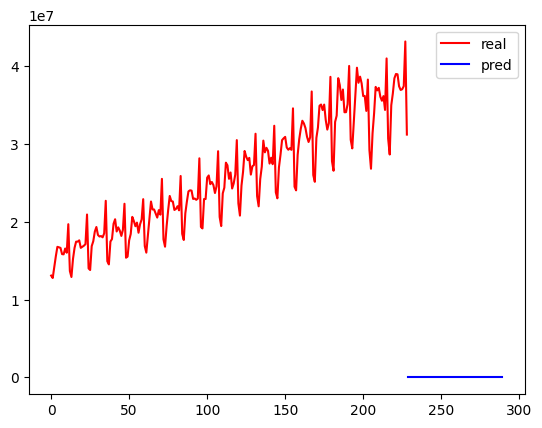

In [49]:
import matplotlib.pyplot as plt

pred = model.predict(X_test_t)
a = np.concatenate((y_train.flatten(), np.zeros(len(y_test)) + np.nan))
b = np.concatenate((np.zeros(len(y_train)) + np.nan, pred.flatten()))
plt.plot(a, "r-", label="real")
plt.plot(b, "b-", label="pred")
plt.legend()
plt.show()